# Recamán's Sequence

## About
Generates Recamán's sequence and draws Edmund Harriss' diagram as shown in in [Numberphile's video](https://www.youtube.com/watch?v=FGC5TdIiT9U).

**Sequence:**
$$\begin{equation}
  a_n=\begin{cases}
    a_{n-1} - n, & \text{if $a_{n-1} - n > 0$ and is new},\\
    a_{n-1} + n, & \text{otherwise}.
  \end{cases}
\end{equation}
$$
(from [Wolfram MathWorld](http://mathworld.wolfram.com/RecamansSequence.html) )

# Requirements
- ``Jupyter`` with ``python 3.6``
- [``drawSvg 1.0.2``](https://pypi.org/project/drawSvg/)
- [``cairo 1.14.12``](http://brewformulas.org/Cairo)

In [4]:
from IPython.display import Image
import drawSvg as draw

## Functions

In [2]:
def recaman_seq(n):
    '''
    '''
    seq = [0]
    
    for i in range(1, n+1):
        # get last element of sequence
        a_i = seq[-1]
        
        # go back by i,
        # if the result is larger than 0 and
        # it is not already in sequence
        if (a_i - i >= 0 and a_i - i not in seq):
            a_i = a_i - i
        
        # else, go forward by i
        else:
            a_i = a_i + i
        seq.append(a_i)
    
    return seq

In [3]:
def draw_recaman_circle(n):
    seq = recaman_seq(n)
    
    # set canvas size
    height = n * 12
    width = height * 2.5
    
    # set start coords
    d = draw.Drawing(width, height, origin=(-25, -height/2))
    #d = draw.Drawing(width, height, origin='center')

    for i, j in enumerate(seq[:-1]):
        '''
        Takes the recaman sequences previously generated as seq,
        Draws each arc
        '''
        # radius is given by i
        r = (i + 1) * 10/2
        # center coord is given by element i and i+1 position
        cx = ((seq[i] + seq[i+1])/2 * 10)
        
        # to alternate top and bottom arcs, check if it is even or odd
        if i % 2 is 0:
            d.append(draw.Arc(cx, 0, r, 180, 0, stroke='black', stroke_width=1, fill='none', fill_opacity=0.2))
        else:
            d.append(draw.Arc(cx, 0, r, 0, 180, stroke='black', stroke_width=1, fill='none', fill_opacity=0.2))
        
        d.setPixelScale(2)
        
        # to save file
        #d.saveSvg('./figs/recaman_circle_{}.svg'.format(n))
        d.savePng('./figs/recaman_circle_{}.png'.format(n))

        # Display in iPython notebook
        d.rasterize()
    
    return d

## Use

In [4]:
print(recaman_seq(65))

[0, 1, 3, 6, 2, 7, 13, 20, 12, 21, 11, 22, 10, 23, 9, 24, 8, 25, 43, 62, 42, 63, 41, 18, 42, 17, 43, 16, 44, 15, 45, 14, 46, 79, 113, 78, 114, 77, 39, 78, 38, 79, 37, 80, 36, 81, 35, 82, 34, 83, 33, 84, 32, 85, 31, 86, 30, 87, 29, 88, 28, 89, 27, 90, 26, 91]


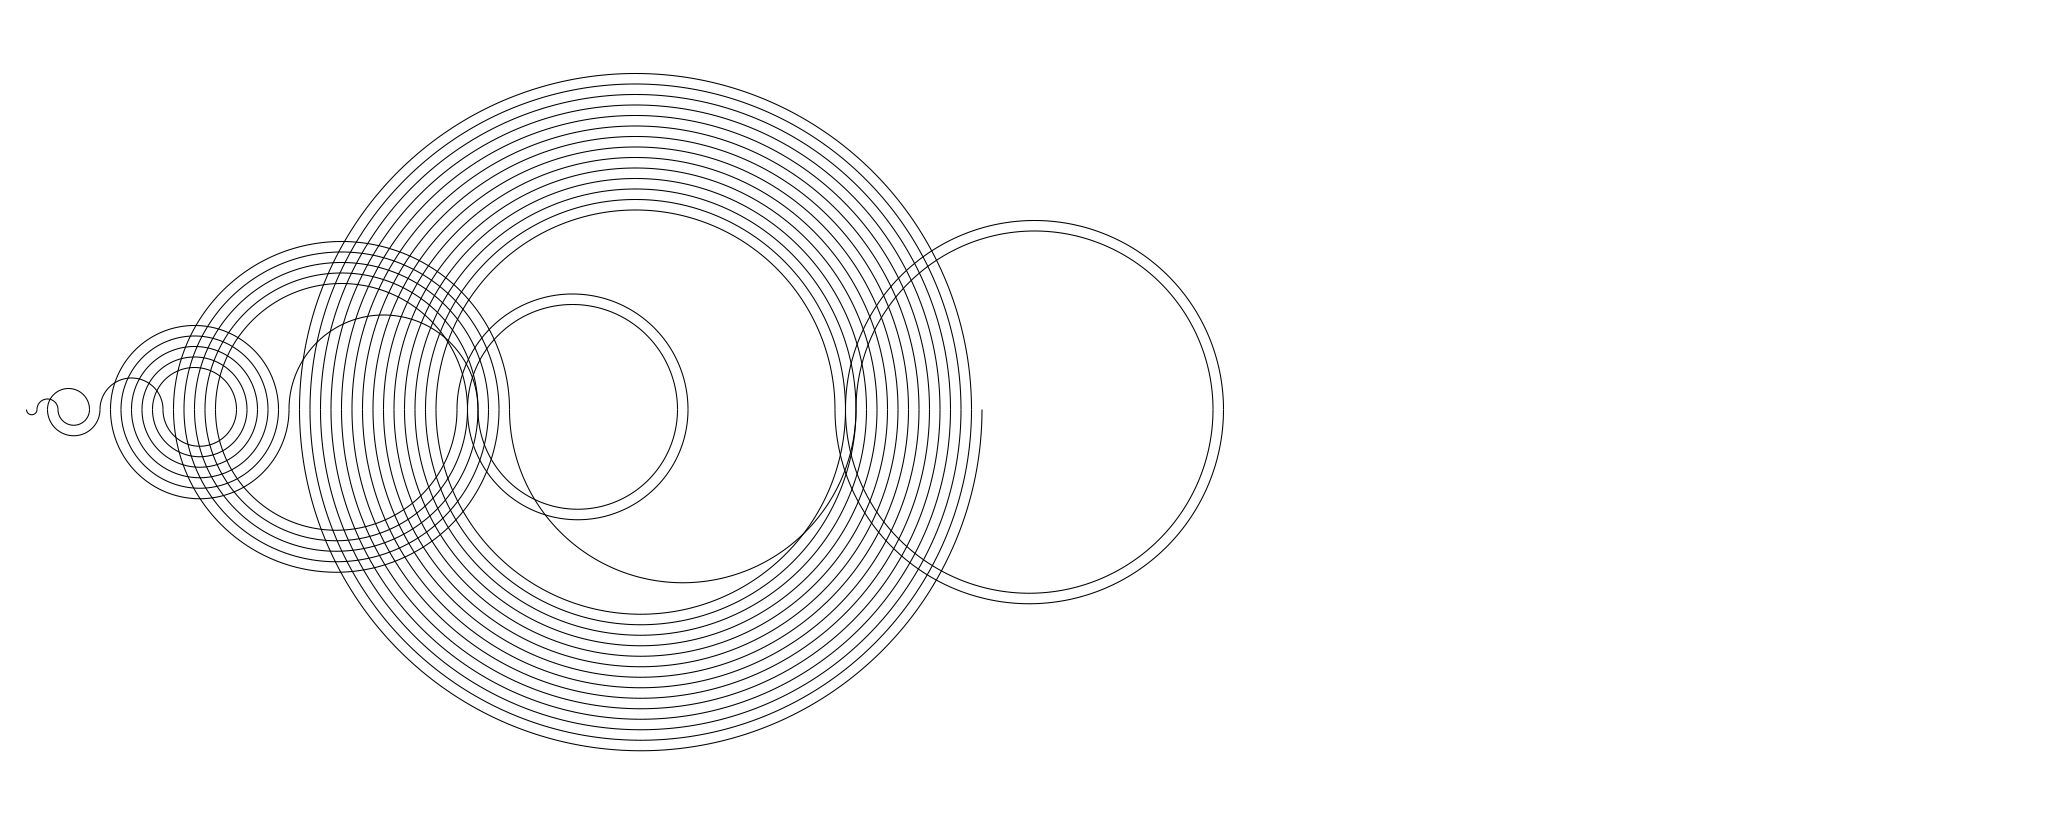

In [7]:
draw_recaman_circle(65)

Externally colored version:

In [5]:
Image("figs/recaman_circle_65c.png")